In [28]:
import os
import sys
import pandas as pd
import yfinance as yf
import plotly as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Import a class from the scripts

In [29]:
# Add the full path to the 'scripts' directory to sys.path
sys.path.append('c:\\Users\\Hp\\Desktop\\10_Academy\\week-1\\scripts')

# Attempt to import FinancialAnalyzer
try:
    from financial_analyzer import FinancialAnalyzer
    print("Module imported successfully.")
except ModuleNotFoundError as e:
    print(f"Error: {e}")


Module imported successfully.


### Stock analysis ('AAPL)

#### Read the raw data

In [30]:
# Load the CSV file of AAPL_historical_data into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Hp\Desktop\10_Academy\week-1\Data\yfinance_data\AAPL_historical_data.csv')

# Display the first few rows of the data
print(df.head())


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


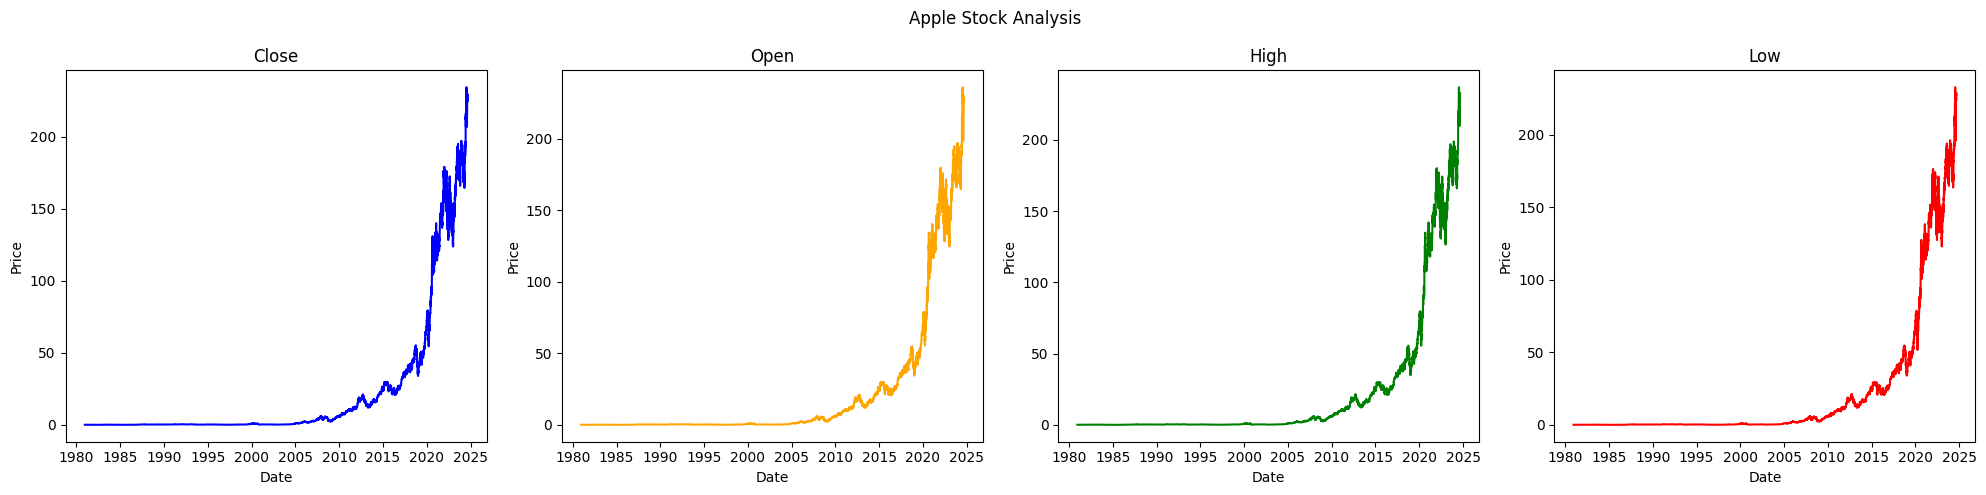

In [31]:
# Fetch the Apple stock data
AAPL = yf.Ticker("AAPL")
hist = AAPL.history(period="max")

# Create subplots with 1 row and 4 columns
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot 'Close' prices
axs[0].plot(hist.index, hist['Close'], color='blue')
axs[0].set_title('Close')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price')

# Plot 'Open' prices
axs[1].plot(hist.index, hist['Open'], color='orange')
axs[1].set_title('Open')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')

# Plot 'High' prices
axs[2].plot(hist.index, hist['High'], color='green')
axs[2].set_title('High')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price')

# Plot 'Low' prices
axs[3].plot(hist.index, hist['Low'], color='red')
axs[3].set_title('Low')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Price')

# Adjust the layout and display the plot
fig.suptitle('Apple Stock Analysis')
plt.tight_layout()
plt.show()


In [32]:
# Create an instance of the FinancialAnalyzer class

analyzer = FinancialAnalyzer('AAPL', '2020-01-01', '2020-12-31')

In [33]:
# Retrieve stock data
stock_data = analyzer.retrieve_stock_data()
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876106,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400558,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.200806,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.189499,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.810043,124486200


In [34]:
# Calculate technical indicators
stock_data_indicators = analyzer.calculate_technical_indicators(stock_data)
stock_data_indicators.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,EMA,MACD,MACD_Signal
Date,,,,,,,,,,,
2020-12-23,132.160004,132.429993,130.779999,130.960007,128.200806,88223700,124.106000,66.417825,124.898504,3.154518,2.500894
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.189499,54930100,124.903000,67.866386,125.571980,3.323474,2.665410
2020-12-28,133.990005,137.339996,133.509995,136.690002,133.810043,124486200,125.908001,73.597952,126.630839,3.794496,2.891227
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.028397,121047300,126.699000,68.522632,127.415521,3.975103,3.108002
2020-12-30,135.580002,135.990005,133.399994,133.720001,130.902618,96452100,127.249000,65.451324,128.015948,3.979567,3.282315


In [35]:
# Plot stock data
analyzer.plot_stock_data(stock_data)
# Plot RSI
analyzer.plot_rsi(stock_data)

# Plot EMA
analyzer.plot_ema(stock_data)

# Plot MACD
analyzer.plot_macd(stock_data)